In [1]:
import pandas as pd

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
# load data
data = pd.read_csv("data/train_data.csv")
data_labels = pd.read_csv("data/train_data_labels.csv")
test = pd.read_csv("data/train_test.csv")
test_labels = pd.read_csv("data/train_test_labels.csv")

print("Data shape:", data.shape)
print("Data labels shape:", data_labels.shape)
print("Test shape:", test.shape)
print("Test labels shape:", test_labels.shape)

Data shape: (784, 3)
Data labels shape: (784, 1)
Test shape: (107, 3)
Test labels shape: (107, 1)


In [3]:
# define classifiers
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

names = [
    "KNN",
    "SVC Linear",
    "SVC RBF",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "MLP",
    "AdaBoost",
    "Naive Bayes",
    "QDA"
]

results = {}

# test every classifier
for name, clf in zip(names, classifiers):
    clf.fit(data, data_labels.values.ravel())  # train
    test_predictions = clf.predict(test)  # test
    acc = accuracy_score(test_labels.values.ravel(), test_predictions)  # calculate accuracy
    results[name] = acc  # store results

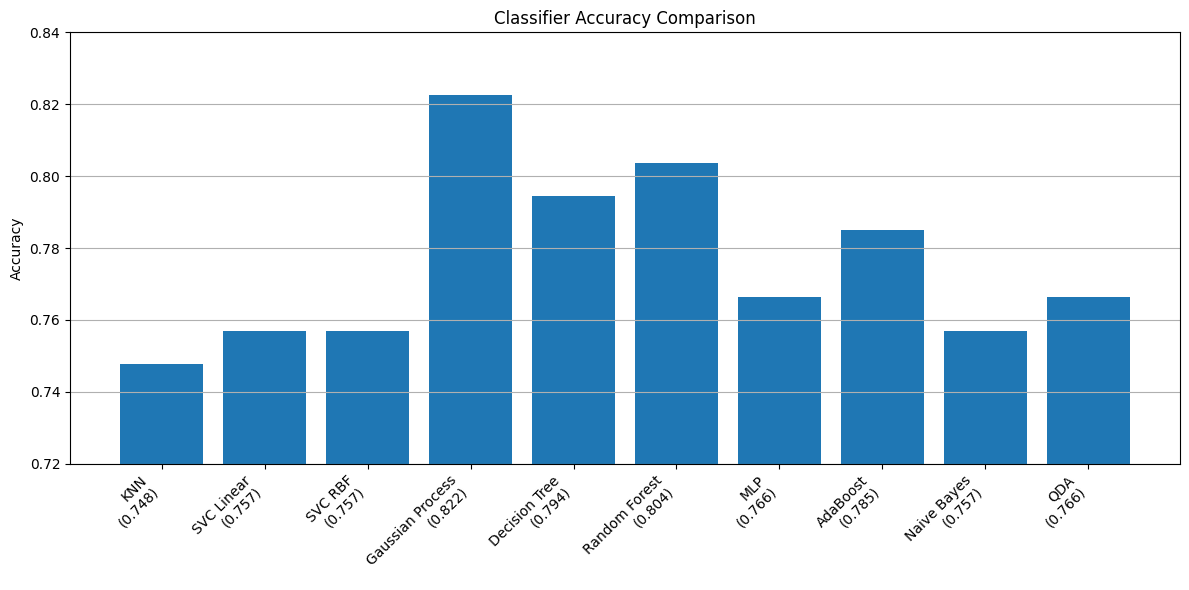

In [4]:
# plot results
import matplotlib.pyplot as plt

names = list(results.keys())
scores = list(results.values())
labels_with_scores = [f"{name}\n({score:.3f})" for name, score in zip(names, scores)]

plt.figure(figsize=(12, 6))
bars = plt.bar(labels_with_scores, scores)
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.ylim(0.72, 0.84)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('results/all_classifiers_accuracies.png')
plt.show()